In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [1]:
def moving_average (d, extra_periods=1, n=3):

  # Historical period length
  cols = len(d)
  # Append np.nan into the demand array to cover future periods
  d = np.append(d, [np.nan]*extra_periods)
  # Define the forecast array
  f = np.full(cols+extra_periods,np.nan)

  # Create all the t+1 forecast until the end of the historical period
  for t in range (n,cols):
    f[t] = np.mean(d[t-n:t])

  # Forecast for all extra periods
  f[t+1:] = np.mean(d[t-n+1:t+1])

  # Return a DataFrame with the demand, forecast & error
  df = pd.DataFrame.from_dict({'Demand':d, 'Forecast':f, 'Error':d-f})

  return df

In [9]:
d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = moving_average(d, extra_periods=4, n=3)
df.index.name = 'Period'

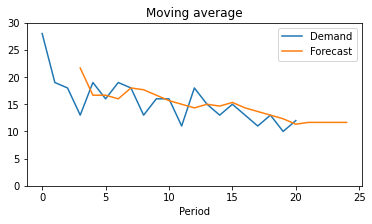

In [10]:
df[['Demand','Forecast']].plot(figsize=(6,3), title='Moving average', ylim=(0,30), style=['-'])